# 13.0.Udemy_Computer_vision_Jospeh_Portilla_13: KERAS

## BASIC KERAS

### HouseKeeping

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

#### Read data 

In [6]:
from numpy import genfromtxt  # generate a numpy array from text file
data = genfromtxt('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/bank_note_data.txt', delimiter=',')

In [7]:
type(data)

numpy.ndarray

In [14]:
data.shape

(1372, 5)

In [8]:
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [16]:
labels = data[:,-1]

In [18]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [19]:
labels.shape

(1372,)

In [20]:
features = data[:,:-1]

In [21]:
features.shape

(1372, 4)

In [22]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [23]:
X = features
y = labels

#### Train/Test Split

In [30]:
# sometimes people like to split 3 ways, train/test/validation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train.shape, len(X_train)

((919, 4), 919)

In [28]:
X_test.shape

(453, 4)

In [29]:
919 + 453

1372

In [32]:
X_train.min(), X_train.max()

(-13.7731, 17.9274)

#### Scaling the data

In [33]:
# In NN, we can get better performance if we standardize the data (Standardization just means 
# normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.)

In [ ]:
#NOTE: 
# -> Fit the training data only (to prevent data leakage
# -> Transform both training and test data

# Data leakage: Data leakage is when information from outside the training dataset is used to create the model.
# Data leakage will result in overfitting your training data

# How to prevent data leakage: Another, perhaps simpler approach is to split your training dataset into train and validation sets, and store away the validation dataset.
# Once you have completed your modeling process and actually created your final model, evaluate it on the validation dataset.
# This can give you a sanity check to see if your estimation of performance has been overly optimistic and has leaked.

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)  #same as scaler = MinMaxScaler()

In [50]:
scaler_object = scaler.fit(X_train) # finds the min and max values
scaler_object

MinMaxScaler(copy=True, feature_range=(0, 1))

In [53]:
X_train_scaled = scaler_object.transform(X_train)

In [54]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0000000000000002)

In [55]:
X_test_scaled = scaler_object.transform(X_test)

In [56]:
X_test_scaled.min(), X_test_scaled.max()

(-0.0010694864308909147, 1.02679563427227)

In [57]:
X_test.min(), X_test.max()

(-13.2869, 17.1116)

In [58]:
X_test_scaled

array([[0.62098955, 0.75284662, 0.21900753, 0.5730998 ],
       [0.48778602, 0.82175665, 0.09174727, 0.56211079],
       [0.51158363, 0.77924916, 0.13830875, 0.50392598],
       ...,
       [0.76115065, 0.62415668, 0.27251204, 0.83616757],
       [0.9047516 , 0.90329171, 0.03658247, 0.42267079],
       [0.49296526, 0.86039507, 0.06714046, 0.1622583 ]])

#### Building NN with Keras

In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [69]:
model = Sequential()
model.add(Dense(units=4, input_dim=4, activation='relu'))  # input layer; has 4 features
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) #  output layer: only 1 output    (sigmoid output:between 0 & 1)

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.fit(X_train_scaled, y_train, epochs=50, verbose=2)

Epoch 1/50
 - 0s - loss: 0.6726 - acc: 0.5713
Epoch 2/50
 - 0s - loss: 0.6647 - acc: 0.6050
Epoch 3/50
 - 0s - loss: 0.6552 - acc: 0.6681
Epoch 4/50
 - 0s - loss: 0.6442 - acc: 0.6213
Epoch 5/50
 - 0s - loss: 0.6307 - acc: 0.7769
Epoch 6/50
 - 0s - loss: 0.6139 - acc: 0.7780
Epoch 7/50
 - 0s - loss: 0.5956 - acc: 0.8085
Epoch 8/50
 - 0s - loss: 0.5753 - acc: 0.8346
Epoch 9/50
 - 0s - loss: 0.5530 - acc: 0.8433
Epoch 10/50
 - 0s - loss: 0.5301 - acc: 0.8498
Epoch 11/50
 - 0s - loss: 0.5062 - acc: 0.8781
Epoch 12/50
 - 0s - loss: 0.4825 - acc: 0.8705
Epoch 13/50
 - 0s - loss: 0.4580 - acc: 0.8781
Epoch 14/50
 - 0s - loss: 0.4341 - acc: 0.8923
Epoch 15/50
 - 0s - loss: 0.4114 - acc: 0.8988
Epoch 16/50
 - 0s - loss: 0.3903 - acc: 0.9032
Epoch 17/50
 - 0s - loss: 0.3702 - acc: 0.9053
Epoch 18/50
 - 0s - loss: 0.3518 - acc: 0.9097
Epoch 19/50
 - 0s - loss: 0.3354 - acc: 0.9108
Epoch 20/50
 - 0s - loss: 0.3197 - acc: 0.9173
Epoch 21/50
 - 0s - loss: 0.3047 - acc: 0.9249
Epoch 22/50
 - 0s - lo

In [93]:
#use predict_class for classifiers (outputs are labels) and use predict for regressions (outputs are non discrete)
predictions = model.predict_classes(X_test_scaled)
predictions[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [92]:
predictions2 = model.predict(X_test_scaled)
predictions2[:5]

array([[0.02384913],
       [0.45184198],
       [0.22685397],
       [0.01847822],
       [0.02500559]], dtype=float32)

#### Evaluate

In [74]:
model.metrics_names

['loss', 'acc']

In [75]:
model.metrics

['accuracy']

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
confusion_matrix(y_test, predictions)

array([[256,   1],
       [ 12, 184]])

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       257
         1.0       0.99      0.94      0.97       196

   micro avg       0.97      0.97      0.97       453
   macro avg       0.97      0.97      0.97       453
weighted avg       0.97      0.97      0.97       453



#### Save the model

#### Load the saved model

In [94]:
from keras.models import load_model
new_model = load_model('../../models/keras/bank_note_data_model.h5')

In [95]:
new_model

## Keras CNN with MNIST

#### Import data

In [204]:
from keras.datasets import mnist

In [205]:
#X_train, y_train, X_test, y_test = mnist.load_data() ValueError: not enough values to unpack (expected 4, got 2)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [206]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [207]:
single_image =  X_train[0]

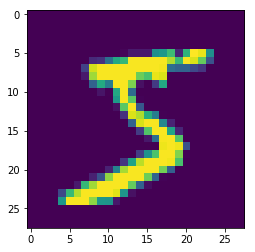

In [208]:
plt.imshow(single_image)

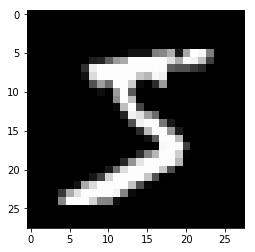

In [209]:
plt.imshow(single_image, cmap='gray')

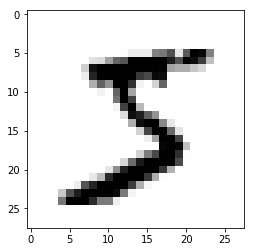

In [210]:
plt.imshow(single_image, cmap='gray_r')

In [211]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [212]:
y_train[0]

5

### One Hot Encoding (convert categorical values)

In [213]:
from keras.utils.np_utils import to_categorical

In [214]:
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test)  # same as y_test_categorical = to_categorical(y_test, num_classes=10)

In [215]:
y_test_categorical.shape

(10000, 10)

In [216]:
y_train_categorical.shape

(60000, 10)

In [217]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [218]:
X_train.min(),X_train.max(), X_test.min(),X_test.max()

(0, 255, 0, 255)

### Scaling

In [219]:
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test/ X_test.max()

In [220]:
X_train_scaled.min(),X_train_scaled.max(), X_test_scaled.min(),X_test_scaled.max()

(0.0, 1.0, 0.0, 1.0)

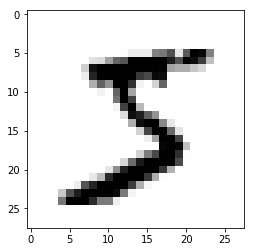

In [221]:
plt.imshow(X_train_scaled[0], cmap='gray_r')

### Reshape

In [222]:
X_train_scaled.shape,  X_test_scaled.shape

((60000, 28, 28), (10000, 28, 28))

In [223]:
X_train_scaled_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],X_train_scaled.shape[2], 1) # same as X_train_scaled.reshape(60000,28,28,1)
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0],X_test_scaled.shape[1],X_test_scaled.shape[2], 1) # same as X_train_scaled.reshape(10000,28,28,1)

In [224]:
X_train_scaled_reshaped.shape

(60000, 28, 28, 1)

In [225]:
X_test_scaled_reshaped.shape

(10000, 28, 28, 1)

### Building Keras Model

In [226]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [227]:
'''
Init signature: Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), 
                       activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

Init signature: MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)

Init signature: Flatten(data_format=None, **kwargs)

Init signature: Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

Signature: cnn_model.compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)
'''

"\nInit signature: Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), \n                       activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', \n                       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)\n\nInit signature: MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)\n\nInit signature: Flatten(data_format=None, **kwargs)\n\nInit signature: Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', \n                kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)\n\nSignature: cnn_model.compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)\

In [228]:
cnn_model = Sequential()

# Convolutional Layer
cnn_model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# Pooling Layer
cnn_model.add(MaxPool2D(pool_size=(2,2)))

# Flattern (2D -> 1D)
cnn_model.add(Flatten())

# Dense Layer
cnn_model.add(Dense(units= 128, activation='relu'))

# Output Layer
cnn_model.add(Dense(units=10, activation='softmax'))

In [239]:
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [240]:
cnn_model.summary()  # 589952 comes from: 4618 (input values) * 128 (neurons per layer) + 128 (bias values)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [241]:
X_train_scaled_reshaped.shape

(60000, 28, 28, 1)

In [242]:
y_train_categorical.shape

(60000, 10)

In [243]:
cnn_model.fit(X_train_scaled_reshaped, y_train_categorical, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1372 - acc: 0.9587
Epoch 2/2
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0497 - acc: 0.9849


### Evaluation

In [245]:
cnn_model.metrics_names

['loss', 'acc']

In [247]:
X_test_scaled_reshaped.shape, y_test

(10000, 28, 28, 1)

In [248]:
score = cnn_model.evaluate(X_test_scaled_reshaped, y_test_categorical)

10000/10000 [==============================] - 5s 479us/step


In [249]:
score

[0.041276450376433786, 0.9867]

In [250]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.041276450376433786
Test accuracy: 0.9867


### Prediction

In [251]:
cnn_predictions =  cnn_model.predict_classes(X_test_scaled_reshaped)

### Validation

In [252]:
from sklearn.metrics import confusion_matrix, classification_report

In [254]:
y_test_categorical.shape

(10000, 10)

In [255]:
cnn_predictions.shape

(10000,)

In [256]:
confusion_matrix(y_test, cnn_predictions)

array([[ 975,    0,    1,    0,    0,    1,    1,    1,    1,    0],
       [   0, 1129,    2,    0,    0,    0,    2,    0,    2,    0],
       [   3,    0, 1019,    1,    0,    0,    1,    5,    3,    0],
       [   0,    0,    0, 1000,    0,    7,    0,    1,    2,    0],
       [   0,    0,    2,    1,  967,    0,    3,    0,    2,    7],
       [   0,    0,    0,    1,    0,  889,    2,    0,    0,    0],
       [   9,    2,    0,    0,    2,    8,  936,    0,    1,    0],
       [   0,    1,    6,    1,    0,    1,    0, 1016,    1,    2],
       [   4,    1,    3,    1,    0,    3,    0,    3,  958,    1],
       [   2,    3,    0,    4,    3,   10,    0,    3,    6,  978]])

In [258]:
print(classification_report(y_test, cnn_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [259]:
#END